In [ ]:
# make some data
from sklearn.datasets import  make_circles
# make a100 samples
n_samples =1000
#create circles
X,y = make_circles(n_samples, noise=0.03,random_state=42)
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]), array([1, 1, 1, 1, 0]))

In [ ]:
#make dataframe or circle data
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


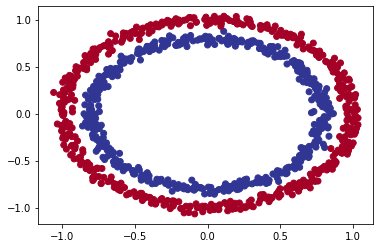

In [ ]:
 #visualize vis.. visu..
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

Note !: the data we are working with is called a toy data set which is  a small but sizable to practice

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
X_sample= X[0]
y_sample=y[0]
X_sample,y_sample

(array([0.75424625, 0.23148074]), 1)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#turn our data into tensors
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
#split data into training and test sets
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
#building a model
import torch
from torch import nn
#make a device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)
  #define the forward method
  def forward(self, x):
    return self.layer_2(self.layer_1)


model_0 = CircleModelV0().to(device)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
 #lets replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
#making predictions
with torch.inference_mode():
  untrained_preds =model_0(X_test.to(device))
print(f"length of preds :{len(untrained_preds)} , and Shape : {untrained_preds.shape}")
print(f"length of test sample {len(X_test)}, shape {X_test.shape}")
print(f"first 10 preds : {untrained_preds[:10]}")
print(f" first ten test samples {X_test[:10]}")
print(f'first 10 labels : {y_test[:10]}')

length of preds :200 , and Shape : torch.Size([200, 1])
length of test sample 200, shape torch.Size([200, 2])
first 10 preds : tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
 first ten test samples tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438],
        [ 0.6323, -0.5711],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.7489, -0.2951],
        [ 0.0538,  0.9739]])
first 10 labels : tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### setup a loss function andan optimizer
which loss function and optimizer should we use
again this is a problem specific
for example forregression problem you might want mae or mse
(mean absolute error or mean squared error)
for clasification you might want binary cross entropy or categorical cross entropy (cross entropy)
as a reminder a loss function measures how wrong your model predictions are.
and as for optimizers two of the most commonand useful are SGD and ADAM, however pytorch has more.
* for the loss function were going to use  'torch.nn.BCEWithLogitsLoss()'
fordiffrent optimizers szz torch.optim

In [ ]:
#setup a loss function
#loss_fn = nn.BCELoss() # require inputs to have  gone through the sigmoid activation function prior to input to BCELoss
loss_fn=nn.BCEWithLogitsLoss() #BCEWithLogitsLoss =sigmoid activation function built in   
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
#calculate accuracy - out of 100 examples what percentage does our model get right ?
def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred)* 100)
  return acc


### Train a model
to train our model we need to build a training loop
1. forward pass
2. calculate the loss
3. optimizer  zero grad
4. loss backward (back propagation)
5. optimizer step (gradient descent)

### 3.1 Going from raw logits ->  prediction probability -> prediction labels
Our Model outputs are going to be raw **logits**
we can convert these **logits** into predictions probabilities by passing them to some kind of activation function (eg digmoid  for binary  crossentropy and softmax for multiclass classification))

Then then we can convert our models prediction probabilities  to prediction labels by either rounding them or taking the 'argmax()'

In [ ]:
#view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [ ]:
 #use the sigmoid activation function on our model logits
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

for our prediction values we need to perform a range_style rounding on them

In [ ]:
y_preds=torch.round(y_pred_probs)
#in full 
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
#check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

###building a training and testing loop


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#set the number of epochs
epochs=100

#put data to target device
X_train, y_train =X_train.to(device),y_train.to(device)
X_test,y_test =X_test.to(device),y_test.to(device)
#building training and evaluation loop
for epoch in range(epochs):
  #training
  model_0.train()

  #forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  #calculate the loss/accuracy
  loss= loss_fn(y_logits, #nn.BCEWithLogitsLoss expect raw logits as  input
                y_train
                )
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward (back propagation)
  loss.backward()

  #optimizer step (gradient descent)
  optimizer.step()
  ### testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits= model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calcualte test loss/acc
    test_loss=loss_fn(test_logits, y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    #print out whats happening 
    if epoch % 10 == 0:
      print(f" epoch : {epoch } | loss: {loss:.5f} | acc: {acc:.2f} | test loss { test_loss:.5f}, test acc: {test_acc:.2f}")


 epoch : 0 | loss: 0.69796 | acc: 51.88 | test loss 0.69440, test acc: 58.00
 epoch : 10 | loss: 0.69590 | acc: 51.25 | test loss 0.69305, test acc: 53.00
 epoch : 20 | loss: 0.69490 | acc: 51.62 | test loss 0.69254, test acc: 49.50
 epoch : 30 | loss: 0.69435 | acc: 51.12 | test loss 0.69236, test acc: 49.50
 epoch : 40 | loss: 0.69401 | acc: 50.88 | test loss 0.69232, test acc: 51.00
 epoch : 50 | loss: 0.69378 | acc: 50.25 | test loss 0.69234, test acc: 50.00
 epoch : 60 | loss: 0.69362 | acc: 50.00 | test loss 0.69239, test acc: 51.50
 epoch : 70 | loss: 0.69351 | acc: 50.25 | test loss 0.69246, test acc: 51.00
 epoch : 80 | loss: 0.69342 | acc: 49.88 | test loss 0.69254, test acc: 50.00
 epoch : 90 | loss: 0.69336 | acc: 49.88 | test loss 0.69262, test acc: 53.00


### make prediction and evaluate the model
from the metrics looks like  our model isn't learning anything
so to inspect it let's  make somepredictionsand make them visual

In other words , vusualize visualize visualize
to do so we are going to import a function called  `plot_decision_boundry()`

In [ ]:
import requests 
from pathlib import Path

#downloada helper function from the Learn Python repo(if its not already downloaded)

if Path("helper_functions.py").is_file():
  print(" the file is already exists")
else: 
  print("downloading ......")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

 the file is already exists


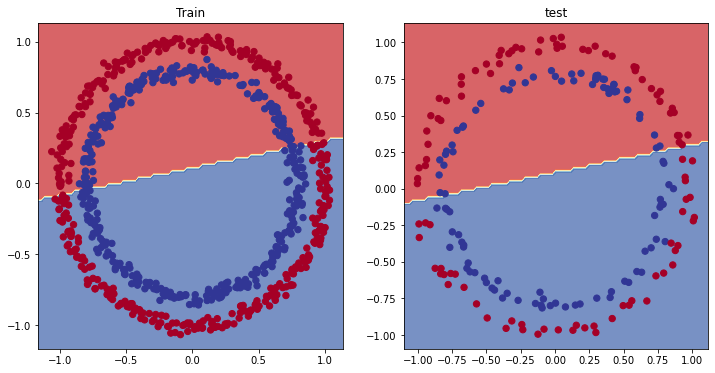

In [ ]:
#plot decision boundrary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)


### improving the model (from modelprospective)
* add more layers - give the model more chances to learn about pattern in the data
* add more hidden units , go from 5 hidden units to 10 hidden units
* fit for longer 
* changing the activation functions
* changing the learning rate
* change the loss function

  These options are from model prospective because they deal directly with the model, rather than  the data
  
  And because these options are all values we (ad ml , dl engineers and ds) can change they are refered as **hyperparameters**

  Lets train and improve our model by :
  * adding more hidden units: 5-> 10
  * increase the number of layers 2->3
  * increase the number of epochs  100 -> 1000 

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x))) #this way of writing operations levrages speed ups where possible behind the scen

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#write a training and evaluation loop for  model 1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#train for longer 
epochs=1000
#put the data on the target device 
X_train, y_train =X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  #Training
  model_1.train()
  #do the forward pass
  y_logits=model_1(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits)) #logits -> pred probabilities -> predictions

  #calculatre the loss /accuracy
  loss=loss_fn(y_logits,y_train)
  acc =accuracy_fn(y_true=y_train,y_pred=y_pred)
  # optimizer zero grad
  optimizer.zero_grad()
  # loss backward (backpropagation)
  loss.backward()
  #optimizer step (gradient descent)
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model_1(X_test).squeeze()
    test_pred =torch.round(torch.sigmoid(test_logits))
    #calculate the loss
    test_loss=loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


    #print out whats happening
    if epoch % 100 == 0 :
      print(f'epoch : {epoch} | Loss: {loss:.5f} | acc :{acc:.2f}  | test loss : {test_loss:.5f} | test acc : {test_acc:.2f}')


epoch : 0 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00
epoch : 100 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00
epoch : 200 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00
epoch : 300 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00
epoch : 400 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00
epoch : 500 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00
epoch : 600 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00
epoch : 700 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00
epoch : 800 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00
epoch : 900 | Loss: 0.69396 | acc :50.88  | test loss : 0.69261 | test acc : 51.00


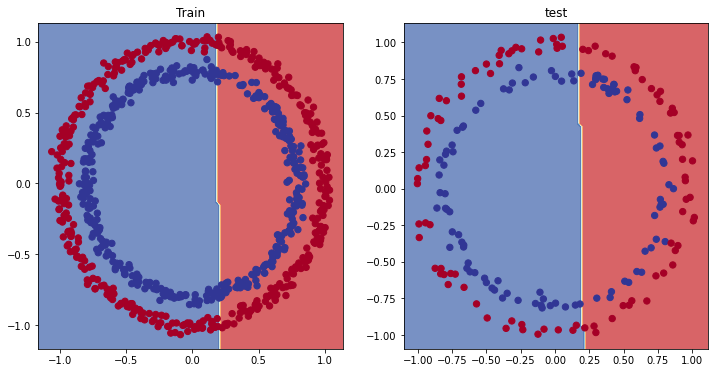

In [ ]:
#plot decision boundrary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

### preparing data to see if our model can fit a straight line 
one way to troubleshoot a larger problem is to test out a smaller problem


In [ ]:
#create some data (same as notebook 01)
weight=0.7
bias=0.3
start=0
end=1
step=0.01

#create data
X_regression =torch.arange(start,end, step).unsqueeze(dim=1)
y_regression =weight * X_regression + bias #linear regression formula without epsilon 

#check the data
print(len(X_regression))
X_regression[:5] , y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#create test and train splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]
#check the length of each 
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

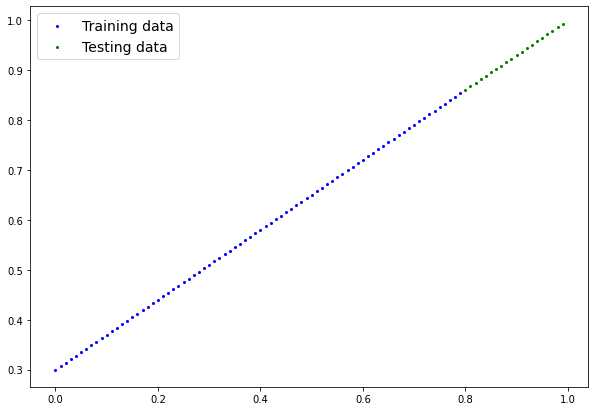

In [ ]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data= X_test_regression, test_labels=y_test_regression )

### adjusting ` model_1` to fit a straight line

In [ ]:
#same architecture as model_1 but using  nn.sequential()
model_2 =nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer =torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [ ]:
#train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs=1000

#put the data on the the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression ,y_test_regression = X_test_regression.to(device) , y_test_regression.to(device)

#Training 
for epoch in range(epochs):
  y_pred=model_2(X_train_regression)
  loss= loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing 
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss =loss_fn(test_pred, y_test_regression)  
  #print out whats happening
  if epoch % 100 == 0:
    print(f' epoch : {epoch} | loss : {loss:.5f} | test loss : {test_loss:.5f}' )

 epoch : 0 | loss : 0.75986 | test loss : 0.91103
 epoch : 100 | loss : 0.02858 | test loss : 0.00081
 epoch : 200 | loss : 0.02533 | test loss : 0.00209
 epoch : 300 | loss : 0.02137 | test loss : 0.00305
 epoch : 400 | loss : 0.01964 | test loss : 0.00341
 epoch : 500 | loss : 0.01940 | test loss : 0.00387
 epoch : 600 | loss : 0.01903 | test loss : 0.00379
 epoch : 700 | loss : 0.01878 | test loss : 0.00381
 epoch : 800 | loss : 0.01840 | test loss : 0.00329
 epoch : 900 | loss : 0.01798 | test loss : 0.00360


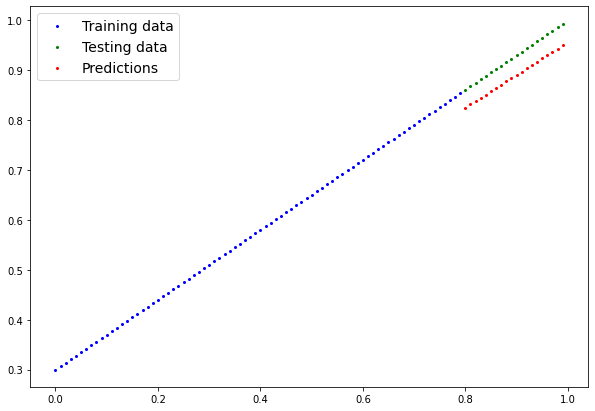

In [ ]:
model_2.eval()
#make some predictions (infrence)
with torch.inference_mode():
  y_preds= model_2(X_test_regression)
#plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu()
                 )

##the missing piece : non_linearity
what patterns could you draw if you were given an infinit amount of straight and non-straight lines ?
Or in machine learning terms, an infinit (but really is finit) of linear and non-linear functions ?

### recreate non-linear data (red and blue data)

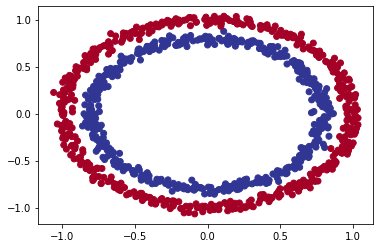

In [ ]:
#make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples= 1000
X,y =make_circles(n_samples, noise = 0.03, random_state=42 )
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu) 

In [ ]:
 #convert data to tensors and then train and test splits
import torch
from sklearn.model_selection import train_test_split
 #turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

#split into  train and test sets
X_train, X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

### building a model with non_linearity
*  linear straight line 
* non_linear not a straight line

In [ ]:
#build a model with a non_linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2,out_features=10)
    self.layer_2 =nn.Linear(in_features=10,out_features=10)
    self.layer_3= nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU() #relu is an activation function for non linear data
  def forward(self, x):
    #where should ze use our non linear activation  functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#setup a loss and optimizer
loss_fn =nn.BCEWithLogitsLoss()
optimizer =torch.optim.SGD(model_3.parameters(),lr=0.01)

###training a modell with non-linearity

In [ ]:
#random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#put all data on target device
X_train, y_train =X_train.to(device),y_train.to(device)
X_test, y_test =X_test.to(device), y_test.to(device)
#loop through the data
epochs = 1000
for epoch in range(epochs):
  #model train
  model_3.train()
  #do the forward pass
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) #logits -> prediction probabilities -> predictions

  #calculate the loss
  loss = loss_fn(y_logits , y_train) #BCEWithLogitsLoss  (takes in logits as first input)
  acc =accuracy_fn(y_true=y_train,y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backwxard
  loss.backward()
  #step the optimizer
  optimizer.step()

  ###Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  #print out whats happening 
  if epoch % 100 == 0:
    print(f'epoch : {epoch} |  loss : {loss:.5f} acc: {acc:.2f} , test loss : {test_loss:.4f} | test acc {test_acc:.4f}')


epoch : 0 |  loss : 0.69295 acc: 50.00 , test loss : 0.6932 | test acc 50.0000
epoch : 100 |  loss : 0.69248 acc: 50.38 , test loss : 0.6926 | test acc 50.0000
epoch : 200 |  loss : 0.69225 acc: 59.00 , test loss : 0.6923 | test acc 56.0000
epoch : 300 |  loss : 0.69209 acc: 70.12 , test loss : 0.6921 | test acc 67.0000
epoch : 400 |  loss : 0.69195 acc: 68.38 , test loss : 0.6920 | test acc 70.0000
epoch : 500 |  loss : 0.69181 acc: 58.50 , test loss : 0.6918 | test acc 62.0000
epoch : 600 |  loss : 0.69168 acc: 54.00 , test loss : 0.6916 | test acc 56.0000
epoch : 700 |  loss : 0.69155 acc: 53.25 , test loss : 0.6915 | test acc 53.0000
epoch : 800 |  loss : 0.69141 acc: 52.62 , test loss : 0.6913 | test acc 53.0000
epoch : 900 |  loss : 0.69128 acc: 52.75 , test loss : 0.6912 | test acc 53.0000


###Evaluating a model trained with non_linear activation functions

In [ ]:
#make some predictions
model_3.eval()
with torch.inference_mode():
  y_preds= torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_test[:10],y_preds[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]))

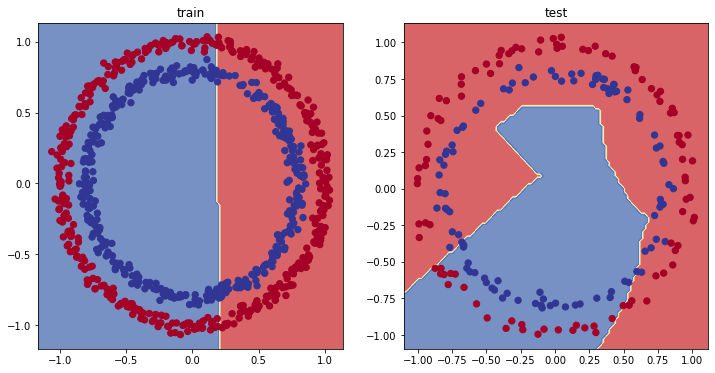

In [ ]:
#plot decision boundries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

##7 replicating non linear activation functions
ML instead of us telling the model what to learn, we give it a tool to discover patterns in data and it tries to figure out the patterns on its own.
And these tools are linear and non-linear functions

In [ ]:
 #create a tensor
A= torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

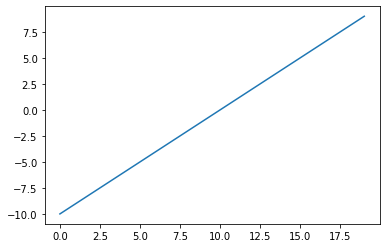

In [ ]:
#visualize the data
plt.plot(A)

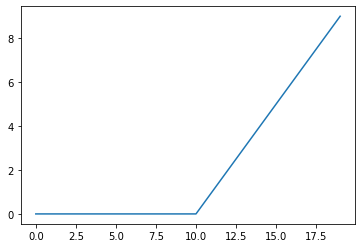

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) #input must be tensors

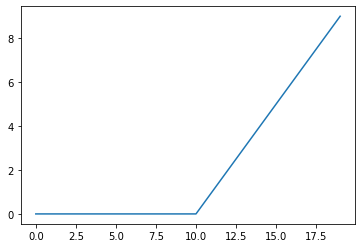

In [ ]:
#plot OUR relu activation function
plt.plot(relu(A))

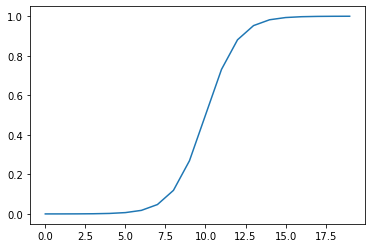

In [ ]:
#now lets do the same for sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))
plt.plot(sigmoid(A))

#putting it all together with multiclass classification

# creating a tou multiclass dataset

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn


Found existing installation: scikit-learn 1.2.1
Uninstalling scikit-learn-1.2.1:
  Successfully uninstalled scikit-learn-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


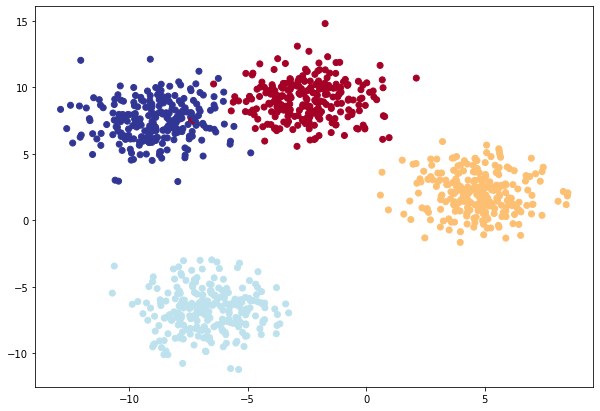

In [ ]:
 #import dependencied
import torch
import  matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters for data classification
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42
#create multi_class data
X_blob,y_blob=make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5, #give the cluster a bit shake up
    random_state=RANDOM_SEED
)

#Turn data into tensors
X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)


#split to train and test
X_blob_train, X_blob_test, y_blob_train,y_blob_test =train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)
 #plot the data , vusualize, vusualize , visualize
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)


In [ ]:
#building a multi class classification  model in pytorch
#create a device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#build a multi class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multi-class  classification model.


    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int) : Number of hidden units between layers, default 8
    Returns:

    Example:   
    """
    super().__init__()
    self.linear_layer_stack =nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features), 
        )
  def forward(self,x):
    return self.linear_layer_stack(x)
#create an instance of the blob model and send it to the target device
model_4= BlobModel(input_features=2, output_features=4,hidden_units=8)
model_4.to(device)

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
# create a loss functio and an optimizer
loss_fn = nn.CrossEntropyLoss()

#create an optimizer for multi class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),lr=0.1) #lr is a hyperparameter that you can change



In [ ]:
next(model_4.parameters()).device

device(type='cpu')

In [ ]:
#getting prodiction probabilities
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test.to(device))

In [ ]:
#convert our logits to probs
y_pred_probs = torch.softmax(y_logits,dim=1)
y_logits[:5], y_pred_probs[:5]

(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834]]),
 tensor([[0.3169, 0.3244, 0.1405, 0.2182],
         [0.3336, 0.1432, 0.2026, 0.3206],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3078, 0.2766, 0.1836, 0.2320],
         [0.3719, 0.1286, 0.1532, 0.3463]]))

In [ ]:
 #convert our model  prediction probabilities to prediction labels
y_preds =torch.argmax(y_pred_probs, dim=1)#
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

###creating a training loop and testing loop for multi class pytorch model

In [ ]:
#fit the  multi class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#set the numlber of epochs
epochs=100
#put the data to the target device
X_blob_train, y_blob_train =X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test= X_blob_test.to(device), y_blob_test.to(device)

#loop through the data
for epoch in range(epochs):
  model_4.train()

  y_logits =model_4(X_blob_train)
  y_pred =torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss= loss_fn(y_logits,y_blob_train)
  acc= accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ###testing
  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_preds= torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss= loss_fn(test_logits,y_blob_test)
    test_acc= accuracy_fn(y_true=y_blob_test,y_pred=test_pred)

    if epoch % 10 == 0:
      print(f'epoch :{epoch} , | Loss: {loss:.5f} ,| acc {acc:.2f} ,,,,, |||| ,,,, test loss {test_loss:.5f} ,, | test acc : {test_acc:.2f}')

epoch :0 , | Loss: 1.15883 ,| acc 40.38 ,,,,, |||| ,,,, test loss 1.07554 ,, | test acc : 23.50
epoch :10 , | Loss: 0.64476 ,| acc 96.75 ,,,,, |||| ,,,, test loss 0.66069 ,, | test acc : 23.50
epoch :20 , | Loss: 0.42535 ,| acc 98.50 ,,,,, |||| ,,,, test loss 0.43074 ,, | test acc : 23.50
epoch :30 , | Loss: 0.25294 ,| acc 99.12 ,,,,, |||| ,,,, test loss 0.24508 ,, | test acc : 23.50
epoch :40 , | Loss: 0.11232 ,| acc 99.25 ,,,,, |||| ,,,, test loss 0.10229 ,, | test acc : 23.50
epoch :50 , | Loss: 0.06627 ,| acc 99.25 ,,,,, |||| ,,,, test loss 0.05848 ,, | test acc : 23.50
epoch :60 , | Loss: 0.05068 ,| acc 99.25 ,,,,, |||| ,,,, test loss 0.04293 ,, | test acc : 23.50
epoch :70 , | Loss: 0.04300 ,| acc 99.25 ,,,,, |||| ,,,, test loss 0.03491 ,, | test acc : 23.50
epoch :80 , | Loss: 0.03836 ,| acc 99.25 ,,,,, |||| ,,,, test loss 0.02988 ,, | test acc : 23.50
epoch :90 , | Loss: 0.03525 ,| acc 99.25 ,,,,, |||| ,,,, test loss 0.02663 ,, | test acc : 23.50


In [ ]:
#make predictions 
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test)
#view the first 1à predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
 #go from logits to pred probabilities
y_pred_probs =torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
#go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

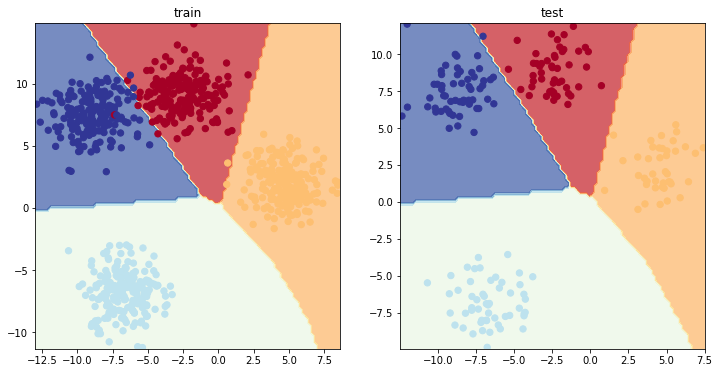

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

### a few more classification metrics
* Accuracy -outa 100 samples how many does our model get right
* precision
* recall 
* F1-score
* confusion matrix
* classification report


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchmetrics import Accuracy
#setup metrics
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
#calculate accuracy
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9950)